***N.B: Before running this notebook, make sure to upload the attached .csv files:***

*scraped_tweets.csv*     
*tweets.csv*

**RQ1: Where is this hashtag mostly 
located?**

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
from operator import itemgetter
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [2]:
df = pd.read_csv('/content/tweets.csv', encoding='cp1252')

In [3]:
df

,Unnamed: 0,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,3580,JNivamn,1/14/2009 4:52,False,Husband - Father!!! - Health Care Industry: In...,Argentina,568,318,27184,198,The same GOP Conservatives who want parents to...,[]
1,854,crisbrooks98502,11/29/2012 22:31,False,"California Girl, Mom of 4 and 1 pup, Gma of 6,...",Australia,1932,1106,36839,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...,[]
2,1646,DefeatTrump2024,9/14/2020 6:52,False,MONDRAGON is the type of companies we need! Em...,Australia,4981,2406,49522,4,Now like in 2018 &amp; 2020 we continue to fig...,[]
3,4004,Michele14177918,2/2/2018 23:11,False,???? ???? Black Lives Matter\n #BLM ???? ???...,Australia,1897,1091,17815,33,MOST Americans support #RoeVWade\n\nI respect ...,['RoeVWade']
4,4023,coastclark,9/19/2014 19:44,False,uncommonly good sense #kindness #vote #LGBTQIA...,Australia,458,401,247307,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3975,4814,rekastner,4/6/2010 23:57,False,Researching Transactional Interpretation of QM...,Unspecified,4773,3510,80067,0,"Amy, address your concerns to Chuck Schumer an...","['RoeVWade', 'DemExit', 'VoteGreen']"
3976,4815,weareprimis,7/14/2021 7:18,False,Providing talent solutions to the technology s...,Unspecified,125,63,130,0,If anyone would like to make a small donation ...,"['plannedparenthood', 'roevwade', 'USabortionl..."
3977,4816,loezzieloes,12/17/2021 17:09,False,"No bees, no food.\nAls je wilt weten wat ik ve...",Unspecified,710,315,5164,0,This! #RoeVWade #WomensRights #women #ABORTION...,"['RoeVWade', 'WomensRights', 'women', 'ABORTIO..."
3978,4820,PaoloMRCorti,11/10/2021 6:57,False,NaN,Unspecified,1111,301,17001,1,@andreacantelmo8 It happened exactly the same ...,"['SCOTUS', 'RoeVWade']"


In [4]:
# Remove duplicate values based on the username
tweets = df.drop_duplicates(subset=['username'], keep="first", inplace=False)                  

In [5]:
tweets

,Unnamed: 0,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,3580,JNivamn,1/14/2009 4:52,False,Husband - Father!!! - Health Care Industry: In...,Argentina,568,318,27184,198,The same GOP Conservatives who want parents to...,[]
1,854,crisbrooks98502,11/29/2012 22:31,False,"California Girl, Mom of 4 and 1 pup, Gma of 6,...",Australia,1932,1106,36839,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...,[]
2,1646,DefeatTrump2024,9/14/2020 6:52,False,MONDRAGON is the type of companies we need! Em...,Australia,4981,2406,49522,4,Now like in 2018 &amp; 2020 we continue to fig...,[]
3,4004,Michele14177918,2/2/2018 23:11,False,???? ???? Black Lives Matter\n #BLM ???? ???...,Australia,1897,1091,17815,33,MOST Americans support #RoeVWade\n\nI respect ...,['RoeVWade']
4,4023,coastclark,9/19/2014 19:44,False,uncommonly good sense #kindness #vote #LGBTQIA...,Australia,458,401,247307,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3975,4814,rekastner,4/6/2010 23:57,False,Researching Transactional Interpretation of QM...,Unspecified,4773,3510,80067,0,"Amy, address your concerns to Chuck Schumer an...","['RoeVWade', 'DemExit', 'VoteGreen']"
3976,4815,weareprimis,7/14/2021 7:18,False,Providing talent solutions to the technology s...,Unspecified,125,63,130,0,If anyone would like to make a small donation ...,"['plannedparenthood', 'roevwade', 'USabortionl..."
3977,4816,loezzieloes,12/17/2021 17:09,False,"No bees, no food.\nAls je wilt weten wat ik ve...",Unspecified,710,315,5164,0,This! #RoeVWade #WomensRights #women #ABORTION...,"['RoeVWade', 'WomensRights', 'women', 'ABORTIO..."
3978,4820,PaoloMRCorti,11/10/2021 6:57,False,NaN,Unspecified,1111,301,17001,1,@andreacantelmo8 It happened exactly the same ...,"['SCOTUS', 'RoeVWade']"


In [6]:
tweets.drop(columns=df.columns[0], axis=1, inplace=True)

In [7]:
tweets

,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,JNivamn,1/14/2009 4:52,False,Husband - Father!!! - Health Care Industry: In...,Argentina,568,318,27184,198,The same GOP Conservatives who want parents to...,[]
1,crisbrooks98502,11/29/2012 22:31,False,"California Girl, Mom of 4 and 1 pup, Gma of 6,...",Australia,1932,1106,36839,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...,[]
2,DefeatTrump2024,9/14/2020 6:52,False,MONDRAGON is the type of companies we need! Em...,Australia,4981,2406,49522,4,Now like in 2018 &amp; 2020 we continue to fig...,[]
3,Michele14177918,2/2/2018 23:11,False,???? ???? Black Lives Matter\n #BLM ???? ???...,Australia,1897,1091,17815,33,MOST Americans support #RoeVWade\n\nI respect ...,['RoeVWade']
4,coastclark,9/19/2014 19:44,False,uncommonly good sense #kindness #vote #LGBTQIA...,Australia,458,401,247307,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt...",[]
...,...,...,...,...,...,...,...,...,...,...,...
3975,rekastner,4/6/2010 23:57,False,Researching Transactional Interpretation of QM...,Unspecified,4773,3510,80067,0,"Amy, address your concerns to Chuck Schumer an...","['RoeVWade', 'DemExit', 'VoteGreen']"
3976,weareprimis,7/14/2021 7:18,False,Providing talent solutions to the technology s...,Unspecified,125,63,130,0,If anyone would like to make a small donation ...,"['plannedparenthood', 'roevwade', 'USabortionl..."
3977,loezzieloes,12/17/2021 17:09,False,"No bees, no food.\nAls je wilt weten wat ik ve...",Unspecified,710,315,5164,0,This! #RoeVWade #WomensRights #women #ABORTION...,"['RoeVWade', 'WomensRights', 'women', 'ABORTIO..."
3978,PaoloMRCorti,11/10/2021 6:57,False,NaN,Unspecified,1111,301,17001,1,@andreacantelmo8 It happened exactly the same ...,"['SCOTUS', 'RoeVWade']"


In [8]:
edges_list = tweets.filter(['location', 'username'])

In [9]:
edges_list

,location,username
0,Argentina,JNivamn
1,Australia,crisbrooks98502
2,Australia,DefeatTrump2024
3,Australia,Michele14177918
4,Australia,coastclark
...,...,...
3975,Unspecified,rekastner
3976,Unspecified,weareprimis
3977,Unspecified,loezzieloes
3978,Unspecified,PaoloMRCorti


In [10]:
edges_list = edges_list.rename(columns={'location': 'Source', 'username': 'Target'})

In [11]:
edges_list

,Source,Target
0,Argentina,JNivamn
1,Australia,crisbrooks98502
2,Australia,DefeatTrump2024
3,Australia,Michele14177918
4,Australia,coastclark
...,...,...
3975,Unspecified,rekastner
3976,Unspecified,weareprimis
3977,Unspecified,loezzieloes
3978,Unspecified,PaoloMRCorti


In [12]:
nodes = tweets['location'] # Get a list of only the node names

In [13]:
nodes

0         Argentina
1         Australia
2         Australia
3         Australia
4         Australia
           ...     
3975    Unspecified
3976    Unspecified
3977    Unspecified
3978    Unspecified
3979    Unspecified
Name: location, Length: 3980, dtype: object

In [14]:
node_names = nodes.to_list()

In [15]:
node_names

['Argentina',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Bahrain',
 'Brazil',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'China',
 'Colombia',
 'Colombia',
 'Denmar

In [16]:
# Remove duplicate location names
nodes = list(dict.fromkeys(nodes))

In [17]:
nodes

['Argentina',
 'Australia',
 'Bahrain',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'Denmark',
 'Ecuador ',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'India',
 'Israel',
 'Italy',
 'Japan',
 'Kenya',
 'Mali',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Romania',
 'Russia',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'UAE',
 'UK',
 'Ukraine',
 'USA',
 'Venezuela',
 'Vietnam',
 'Unspecified']

In [18]:
edges = list(edges_list.apply(tuple, axis=1))

In [19]:
edges

[('Argentina', 'JNivamn'),
 ('Australia', 'crisbrooks98502'),
 ('Australia', 'DefeatTrump2024'),
 ('Australia', 'Michele14177918'),
 ('Australia', 'coastclark'),
 ('Australia', 'metaxas_ari'),
 ('Australia', 'VirginiaLoughn1'),
 ('Australia', 'WutzerFayce'),
 ('Australia', 'Rossi12Agnese'),
 ('Australia', '63Immigrant'),
 ('Australia', 'Zack_Hamell'),
 ('Australia', 'futuritymom'),
 ('Australia', 'suzyqjordan'),
 ('Australia', 'kristafrances'),
 ('Bahrain', 'nancyhighlands7'),
 ('Brazil', 'Ribsmoker'),
 ('Canada', 'greentim'),
 ('Canada', 'lastnametaco'),
 ('Canada', 'ElectionNyc'),
 ('Canada', 'RobertMaguire_'),
 ('Canada', 'LopezResists'),
 ('Canada', 'JoeyChurchman'),
 ('Canada', 'ForgeRat'),
 ('Canada', 'kahruveldesign'),
 ('Canada', 'Joeanthony_nyc'),
 ('Canada', 'MarilynT4'),
 ('Canada', 'dawnresist'),
 ('Canada', 'RedHairnBlkLthr'),
 ('Canada', 'nonbinarywrites'),
 ('Canada', 'NHFTHR'),
 ('Canada', 'DLUCKS013'),
 ('Canada', 'RedPillDetox'),
 ('Canada', 'Aubrey__H'),
 ('Canada', 

In [20]:
print(len(nodes))

44


In [21]:
print(len(edges))

3980


In [22]:
G = nx.Graph()

In [23]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [24]:
nx.info(G)

'Graph with 4024 nodes and 3980 edges'

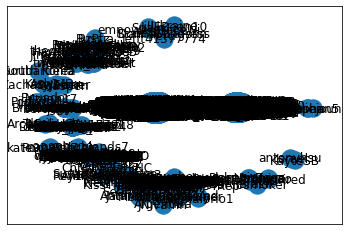

In [25]:
nx.draw_networkx(G, with_labels=True)

Network density: 0.0004917054965756048


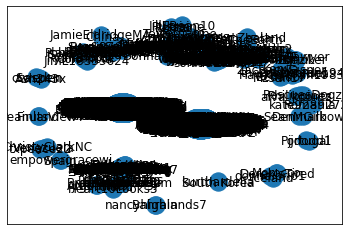

In [26]:
density = nx.density(G)
print("Network density:", density)
nx.draw_networkx(G, with_labels=True)

In [27]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 2


In [28]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0


In [29]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [30]:
sorted_degree = sorted(degree_dict.items(), key= itemgetter(1), reverse=True)

In [31]:
print("Top 44 nodes by degree:")
for d in sorted_degree[:44]:
    print(d)

Top 44 nodes by degree:
('USA', 2119)
('Unspecified', 1642)
('Canada', 67)
('UK', 56)
('Australia', 13)
('France', 11)
('India', 9)
('Germany', 8)
('Netherlands', 4)
('Peru', 3)
('Puerto Rico', 3)
('South Africa', 3)
('Colombia', 2)
('Israel', 2)
('Italy', 2)
('Japan', 2)
('New Zealand', 2)
('Philippines', 2)
('Singapore', 2)
('Sweden', 2)
('Switzerland', 2)
('Venezuela', 2)
('Argentina', 1)
('Bahrain', 1)
('Brazil', 1)
('China', 1)
('Denmark', 1)
('Ecuador ', 1)
('Finland', 1)
('Iceland', 1)
('Kenya', 1)
('Mali', 1)
('Mexico', 1)
('Morocco', 1)
('Poland', 1)
('Portugal', 1)
('Romania', 1)
('Russia', 1)
('South Korea', 1)
('Spain', 1)
('Thailand', 1)
('UAE', 1)
('Ukraine', 1)
('Vietnam', 1)


In [32]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G, max_iter= 700) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [33]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 44 nodes by betweenness centrality:")
for b in sorted_betweenness[:44]:
    print(b)

Top 44 nodes by betweenness centrality:
('USA', 0.27737340229038576)
('Unspecified', 0.16652890830484535)
('Canada', 0.0002732918241246596)
('UK', 0.00019035251431568333)
('Australia', 9.641231244560585e-06)
('France', 6.798304082702976e-06)
('India', 4.449799035951039e-06)
('Germany', 3.460954805739697e-06)
('Netherlands', 7.416331726585066e-07)
('Peru', 3.708165863292533e-07)
('Puerto Rico', 3.708165863292533e-07)
('South Africa', 3.708165863292533e-07)
('Colombia', 1.2360552877641775e-07)
('Israel', 1.2360552877641775e-07)
('Italy', 1.2360552877641775e-07)
('Japan', 1.2360552877641775e-07)
('New Zealand', 1.2360552877641775e-07)
('Philippines', 1.2360552877641775e-07)
('Singapore', 1.2360552877641775e-07)
('Sweden', 1.2360552877641775e-07)
('Switzerland', 1.2360552877641775e-07)
('Venezuela', 1.2360552877641775e-07)
('Argentina', 0.0)
('Bahrain', 0.0)
('Brazil', 0.0)
('China', 0.0)
('Denmark', 0.0)
('Ecuador ', 0.0)
('Finland', 0.0)
('Iceland', 0.0)
('Kenya', 0.0)
('Mali', 0.0)
('Me

In [34]:
communities = community.greedy_modularity_communities(G)


In [35]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [36]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: USA | Eigenvector Centrality: 0.7070666663685187
Name: DrSeraDPT | Eigenvector Centrality: 0.015361872620116266
Name: jess_dozier | Eigenvector Centrality: 0.015361872620116266
Name: michelerdecker | Eigenvector Centrality: 0.015361872620116266
Name: cicardon | Eigenvector Centrality: 0.015361872620116266


In [37]:
for i in range(22):
  # First get a list of just the nodes in that class
  class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == i]

  # Then create a dictionary of the eigenvector centralities of those nodes
  class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

  # Then sort that dictionary and print the first 5 results
  class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

  print("Modularity Class " + str(i) + " Sorted by Eigenvector Centrality:")
  print("Name:", class0_sorted_by_eigenvector[0][0], "| Eigenvector Centrality:", class0_sorted_by_eigenvector[0][1])
  print()

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: USA | Eigenvector Centrality: 0.7070666663685187

Modularity Class 1 Sorted by Eigenvector Centrality:
Name: Unspecified | Eigenvector Centrality: 4.692219918552552e-13

Modularity Class 2 Sorted by Eigenvector Centrality:
Name: Canada | Eigenvector Centrality: 1.8041923177396543e-160

Modularity Class 3 Sorted by Eigenvector Centrality:
Name: UK | Eigenvector Centrality: 3.068842759183959e-168

Modularity Class 4 Sorted by Eigenvector Centrality:
Name: Australia | Eigenvector Centrality: 6.2817933458181e-228

Modularity Class 5 Sorted by Eigenvector Centrality:
Name: France | Eigenvector Centrality: 2.932151156528933e-234

Modularity Class 6 Sorted by Eigenvector Centrality:
Name: India | Eigenvector Centrality: 1.0549133279538975e-241

Modularity Class 7 Sorted by Eigenvector Centrality:
Name: Germany | Eigenvector Centrality: 5.486624794849186e-246

Modularity Class 8 Sorted by Eigenvector Centrality:
Name: Netherlands | Eig

In [38]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Slipstickguy', 'BristolMyersSqi', 'SummerStarbuck1', '97mike1', 'tehuti88', 'Tombaan66', 'dbjean22', 'reedcliffe83', 'DrDinD', 'lisasharper', 'mwkraus', 'StephSwisher934', 'Firestorm1776', 'emtfr', 'DingoWTF58', 'MinnesotaMaryS', 'MyandraM', 'rebekahannee', 'SergeHandfeld', 'HappierJavier', 'antipodal', 'MiriamCYP', 'tatiana_toruno', 'SueSchlisman', 'vilija', 'jfmiller218', 'MrCodyGrace', 'pameladyer', 'DavidSixsmith87', 'ashtari_elena', 'gryphonmom', 'SoniaOreffice', 'azmichael1976', 'ASCOPost', 'CDonatac', 'JoshBeckerSV', 'zimzimiz', 'BrigidHart', 'joetetzlaff', 'soldbythedoc', 'williesband', 'PolarBearMama4', 'ontherecord27', 'Franczek', 'teres9900', 'ahoopervt', 'Diane_Tober', 'jk95_1453', 'DeeVotesBlue', 'D_PaulAngel', 'Frankmartin9953', 'WildFlowerSeed_', 'BemusedIreland', 'UtahRider', 'GOLD_pharma', 'jljolly1', 'madeusk2409', 'jeffreycpacfa', 'OneWorldly', 'njTare', 'mimizelman', 'maureen_brookes', 'SasserModestino', 'moxiepassion', 'ThomasFavalora', 'msmulholland', '

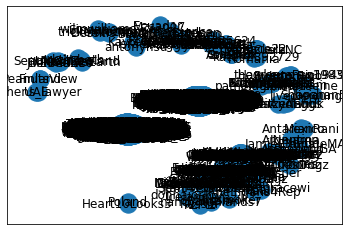

In [39]:
nx.draw_networkx(G, with_labels=True)

In [40]:
# this returns a list of set of nodes belonging to the 
# different (weakly) connected components
components = list(nx.connected_components(G))

# sort the component according to their size
components = list(sorted(components, key=lambda x:len(x), reverse=True))

In [41]:
# make a list with the size of each component
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))

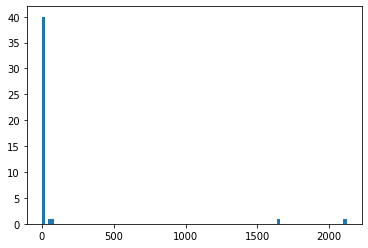

In [42]:
# plot the histogram of component sizes
hist = plt.hist(comp_sizes, bins=100)

In [43]:
# let's make a new graph which is the subgraph of G corresponding to 
# the largest connected component
# let's find the largest component
largest_comp = components[0]
LCC = G.subgraph(largest_comp)


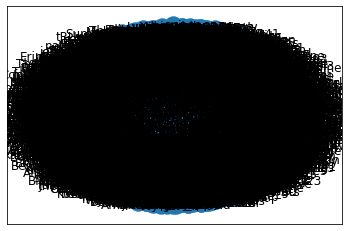

In [44]:
nx.draw_networkx(LCC, with_labels=True)

In [45]:
LCC.number_of_nodes()



2120

In [46]:
nx.write_gexf(G, 'tweets_network.gexf')

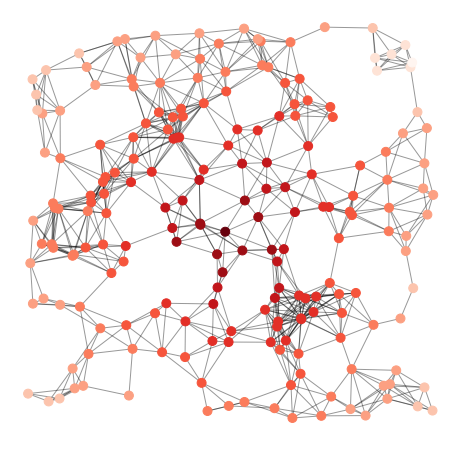

In [47]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

**RQ2: When were the user accounts 
tweeting created at?**

Are there multiple accounts created on the same date ?

No, since there were no duplicates based on the same date.


In [48]:
# Check for Duplicates based on Creation Date
dups = df[df.duplicated(['Creation Date'], keep=False)]

In [49]:
dups

,Unnamed: 0,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
743,2308,DannisWrites,10/7/2022 0:52,False,I was DanniStories here but my phone number ch...,USA,579,101,237,1244,DEAR GOP; #TrumpToupee #RoevWade https://t.co/...,"['TrumpToupee', 'RoevWade']"
1047,873,ShellHawk,3/21/2009 16:21,False,"Halloween nut, ceramist, potter, artist, survi...",USA,1046,1110,13401,0,Absolutely!\n#RoeVWade #contraception #WomensR...,"['RoeVWade', 'contraception', 'WomensRights']"
2014,3182,ScorpioOx61,1/15/2013 3:08,False,"Libertarian, life-loving larrikin. Into music,...",USA,1168,1186,3862,0,"@LidiaNews If you believe #Democrats, women (d...","['Democrats', 'SupremeCourt', 'RoeVWade', 'abo..."
2339,341,Buttrfligyrl,3/21/2009 16:21,False,NaN,Unspecified,405,54,2247,0,@McDonalds We don't get to have our right to H...,"['DoBetter', 'WeWillRiot', 'RoeVWade', 'MyBody..."
2821,394,ozma1010,1/15/2013 3:08,False,NaN,Unspecified,2698,1218,111439,1418,?€?Roe vs Wade is an important precedent of th...,['RoeVWade']
3813,4125,Badass4Mothers,6/9/2020 2:21,False,"Quotes from American herstory on democracy, ju...",Unspecified,5938,5881,24807,0,?€?Women have always been the chief sufferers ...,"['VoteBlue2022', 'VoteBlueToProtectWomen', 'Ro..."
3877,4340,SJPurrs,6/9/2020 2:21,False,"Happy Aussie hubby. Love: democracy, social ju...",Unspecified,6192,6179,2949,1119,Today is 100 days since the extreme Supreme Co...,['RoeVWade']
3880,4344,teddyaltmansgf,10/7/2022 0:52,False,NaN,Unspecified,42,11,133,9,Tonight?€?s @GreysABC is very meta. The subjec...,[]


**RQ3: What were the highest 
interactions with the tweets posted and 
what sentiment did they generate?**

In [50]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!pip install langdetect
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2efbe02f18b4e8885b7268538e5f615e60484ab8f6ea75a1ecfd5e764bfa24f1
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 10.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=a7ab4a7bf68d0d9127462b3583ef30608f52cc157cb6b27650fcff92a0eef132
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d461

**General Sentiment From All tweets**

In [52]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [54]:
# Remove duplicate values based on the text of the tweet
tweets = df.drop_duplicates(subset=['text'], keep="first", inplace=False) 

In [55]:
tweets

,Unnamed: 0,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,3580,JNivamn,1/14/2009 4:52,False,Husband - Father!!! - Health Care Industry: In...,Argentina,568,318,27184,198,The same GOP Conservatives who want parents to...,[]
1,854,crisbrooks98502,11/29/2012 22:31,False,"California Girl, Mom of 4 and 1 pup, Gma of 6,...",Australia,1932,1106,36839,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...,[]
2,1646,DefeatTrump2024,9/14/2020 6:52,False,MONDRAGON is the type of companies we need! Em...,Australia,4981,2406,49522,4,Now like in 2018 &amp; 2020 we continue to fig...,[]
3,4004,Michele14177918,2/2/2018 23:11,False,???? ???? Black Lives Matter\n #BLM ???? ???...,Australia,1897,1091,17815,33,MOST Americans support #RoeVWade\n\nI respect ...,['RoeVWade']
4,4023,coastclark,9/19/2014 19:44,False,uncommonly good sense #kindness #vote #LGBTQIA...,Australia,458,401,247307,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,4800,theazhighways,1/3/2022 21:05,False,#America1st Politicians are HATED by Both Part...,Unspecified,2858,1681,21723,2,How come it?€?s always white liberals that are...,['BLM']
3975,4814,rekastner,4/6/2010 23:57,False,Researching Transactional Interpretation of QM...,Unspecified,4773,3510,80067,0,"Amy, address your concerns to Chuck Schumer an...","['RoeVWade', 'DemExit', 'VoteGreen']"
3976,4815,weareprimis,7/14/2021 7:18,False,Providing talent solutions to the technology s...,Unspecified,125,63,130,0,If anyone would like to make a small donation ...,"['plannedparenthood', 'roevwade', 'USabortionl..."
3977,4816,loezzieloes,12/17/2021 17:09,False,"No bees, no food.\nAls je wilt weten wat ik ve...",Unspecified,710,315,5164,0,This! #RoeVWade #WomensRights #women #ABORTION...,"['RoeVWade', 'WomensRights', 'women', 'ABORTIO..."


In [56]:
# Get Tweets texts
tweets = tweets['text'].tolist()

In [57]:
tweets

['The same GOP Conservatives who want parents to decide if their child gets vaccinated don?€?t want parents to decide if their raped 10 year old gets an abortion. \n#FreshWords #RoeVWade',
 'CALIFORNIA VOTER GUIDE: @abc7sophie breaks down Proposition 1, which would amend California?€?s constitution to guarantee a right to an #abortion and #contraceptives.??#news??#abc7la??#prop1??#election??#roevwade??#voterguide https://t.co/agGK0kGIK7 https://t.co/AlHwTdrtEU',
 'Now like in 2018 &amp; 2020 we continue to fight Fascism! These Nazi Trump &amp; GQP are funded, taught &amp; supported by the Nazi Putin!  Autocrats cannot survive with Democracy aka US ???????? us - We The People in their WAY! STAY IN THERE WAY! VOTE BLUE!\n\n#PutinOwnsGOP\n#Roevember \n#RoevWade https://t.co/8vqXZJPajf',
 "MOST Americans support #RoeVWade\n\nI respect your right to believe what you want. I draw the line at laws forced on others which are based on religious mythology in defiance of reason, science, and best

In [58]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [59]:
noOfTweet = len(tweets)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 #tweet_list.append(tweet.text)
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [60]:
print('total number: ',len(tweets))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1205
positive number:  551
negative number:  417
neutral number:  237


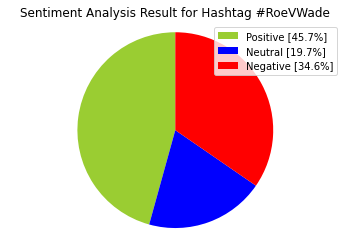

In [61]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for Hashtag #RoeVWade' )
plt.axis('equal')
plt.show()

In [62]:
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [63]:
clean_tweets = []
for tweet in tweets: 
  tweet = clean_tweet(tweet)
  clean_tweets.append(tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [64]:
clean_tweets

['same gop conservatives who want parents decide if their child gets vaccinated don t want parents decide if their raped 10 year old gets abortion',
 'california voter guide breaks down proposition 1 which would amend california s constitution guarantee right',
 'now like 2018 amp 2020 we continue fight fascism these nazi trump amp gqp are funded taught amp supported by nazi putin autocrats cannot survive with democracy aka us us we people their way stay there way vote blue',
 'most americans support i respect your right believe what you want i draw line at laws forced others which are based religious mythology defiance reason science best practice medicine this isnt gilead',
 'pro choice doesnt mean i love abortion it means i dont tell other people what do when they are situation i may never understand myself',
 'breaking defend these candidates are vital product women s bodily autonomy please vote',
 'now do justices their republican views religion misogyny influencing',
 'hell no we

In [65]:
noOfTweet = len(clean_tweets)
positive = 0
negative = 0
neutral = 0
polarity = 0
neutral_list = []
negative_list = []
positive_list = []

for tweet in clean_tweets:
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [66]:
print('total number: ',len(clean_tweets))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1205
positive number:  554
negative number:  426
neutral number:  225


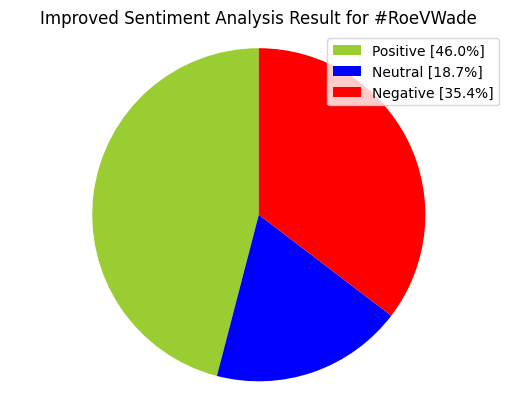

In [67]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Improved Sentiment Analysis Result for #RoeVWade' )
plt.axis('equal')
plt.show()

In [68]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

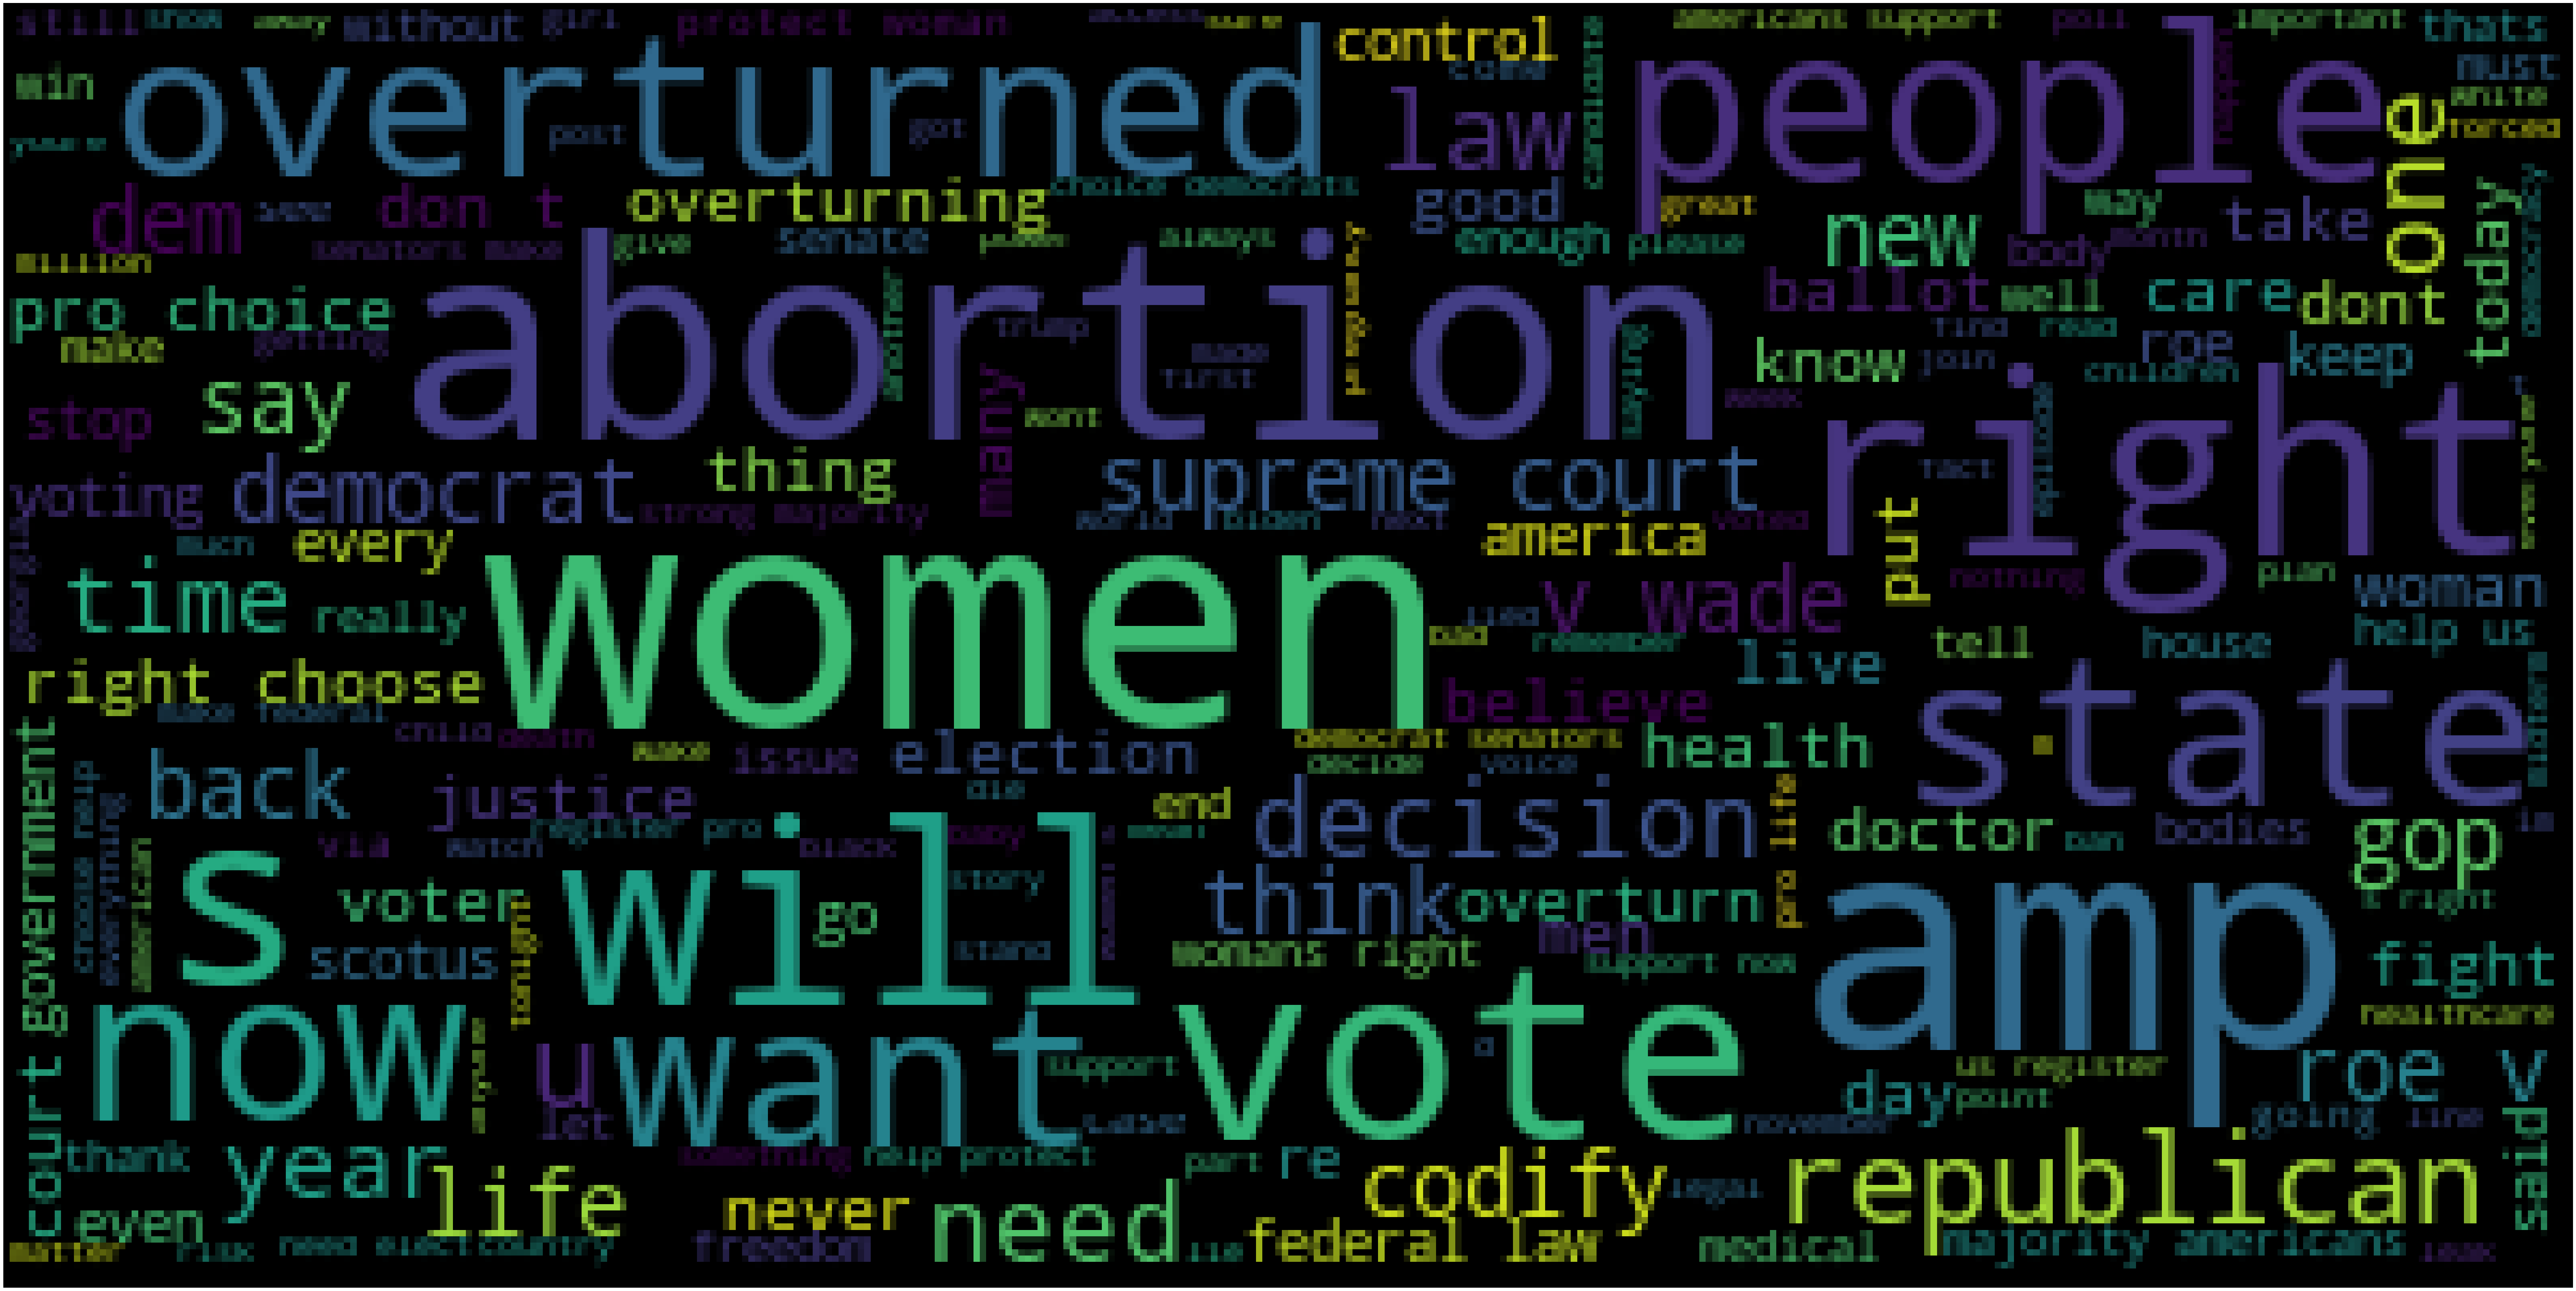

In [69]:
wc(clean_tweets,'black','Frequent Words' )

Sentiment From High Retweeted Tweets

In [70]:
# Remove duplicate values based on the text of the tweet
tweets = df.drop_duplicates(subset=['text'], keep="first", inplace=False)

In [71]:
tweets 

,Unnamed: 0,username,Creation Date,Verified or Not,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,3580,JNivamn,1/14/2009 4:52,False,Husband - Father!!! - Health Care Industry: In...,Argentina,568,318,27184,198,The same GOP Conservatives who want parents to...,[]
1,854,crisbrooks98502,11/29/2012 22:31,False,"California Girl, Mom of 4 and 1 pup, Gma of 6,...",Australia,1932,1106,36839,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...,[]
2,1646,DefeatTrump2024,9/14/2020 6:52,False,MONDRAGON is the type of companies we need! Em...,Australia,4981,2406,49522,4,Now like in 2018 &amp; 2020 we continue to fig...,[]
3,4004,Michele14177918,2/2/2018 23:11,False,???? ???? Black Lives Matter\n #BLM ???? ???...,Australia,1897,1091,17815,33,MOST Americans support #RoeVWade\n\nI respect ...,['RoeVWade']
4,4023,coastclark,9/19/2014 19:44,False,uncommonly good sense #kindness #vote #LGBTQIA...,Australia,458,401,247307,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,4800,theazhighways,1/3/2022 21:05,False,#America1st Politicians are HATED by Both Part...,Unspecified,2858,1681,21723,2,How come it?€?s always white liberals that are...,['BLM']
3975,4814,rekastner,4/6/2010 23:57,False,Researching Transactional Interpretation of QM...,Unspecified,4773,3510,80067,0,"Amy, address your concerns to Chuck Schumer an...","['RoeVWade', 'DemExit', 'VoteGreen']"
3976,4815,weareprimis,7/14/2021 7:18,False,Providing talent solutions to the technology s...,Unspecified,125,63,130,0,If anyone would like to make a small donation ...,"['plannedparenthood', 'roevwade', 'USabortionl..."
3977,4816,loezzieloes,12/17/2021 17:09,False,"No bees, no food.\nAls je wilt weten wat ik ve...",Unspecified,710,315,5164,0,This! #RoeVWade #WomensRights #women #ABORTION...,"['RoeVWade', 'WomensRights', 'women', 'ABORTIO..."


In [72]:
tweets = tweets[['retweetcount', 'text']]

In [73]:
tweets

,retweetcount,text
0,198,The same GOP Conservatives who want parents to...
1,32,CALIFORNIA VOTER GUIDE: @abc7sophie breaks dow...
2,4,Now like in 2018 &amp; 2020 we continue to fig...
3,33,MOST Americans support #RoeVWade\n\nI respect ...
4,5,"Pro-choice doesn't mean ""I Love Abortion"".\nIt..."
...,...,...
3972,2,How come it?€?s always white liberals that are...
3975,0,"Amy, address your concerns to Chuck Schumer an..."
3976,0,If anyone would like to make a small donation ...
3977,0,This! #RoeVWade #WomensRights #women #ABORTION...


In [74]:
sorted_tweets = tweets.sort_values(by=['retweetcount'], ascending=False)

In [75]:
sorted_tweets

,retweetcount,text
2323,52238,A reminder that the same lawmakers who say gun...
2851,33187,Since SCOTUS is going to overturn #RoeVWade I ...
2961,27767,An extremist Supreme Court is poised to overtu...
33,26642,Ya so I was raped at 13 before Roe V Wade. The...
148,22586,If you are upset that #RoeVWade is about to be...
...,...,...
661,0,@CNN A 'grave betrayal' is the reversal of #Ro...
2091,0,Social media's business model = spreading raci...
2093,0,@patdennis Seriously Oz? How does a political ...
2096,0,Voting made harder for the people that DO NOT ...


In [76]:
# Keep only tweets with high retweet counts (above 60 retweets)
sorted_tweets = sorted_tweets.loc[df['retweetcount'] > 100]

In [77]:
sorted_tweets

,retweetcount,text
2323,52238,A reminder that the same lawmakers who say gun...
2851,33187,Since SCOTUS is going to overturn #RoeVWade I ...
2961,27767,An extremist Supreme Court is poised to overtu...
33,26642,Ya so I was raped at 13 before Roe V Wade. The...
148,22586,If you are upset that #RoeVWade is about to be...
3596,20727,In 2013 I got pregnant with triplets but we ha...
2111,16618,Don?€?t forget to turn your clocks back 50 yea...
282,10592,All 50 Republican Senators opposed a House-pas...
274,4021,I?€?m 40. I am going to die with less rights t...
424,3878,Why does the GOP think that my wife should be ...


In [78]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

clean_tweets = []
for tweet in sorted_tweets['text']: 
  tweet = clean_tweet(tweet)
  clean_tweets.append(tweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [79]:
len(clean_tweets)

58

In [80]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
noOfTweet = len(clean_tweets)
positive = 0
negative = 0
neutral = 0
polarity = 0
neutral_list = []
negative_list = []
positive_list = []

for tweet in clean_tweets:
 analysis = TextBlob(tweet)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [82]:
print('total number: ',len(clean_tweets))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  58
positive number:  32
negative number:  19
neutral number:  7


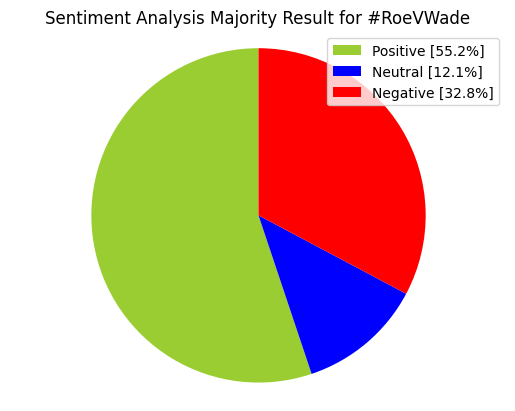

In [83]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Majority Result for #RoeVWade' )
plt.axis('equal')
plt.show()

In [84]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

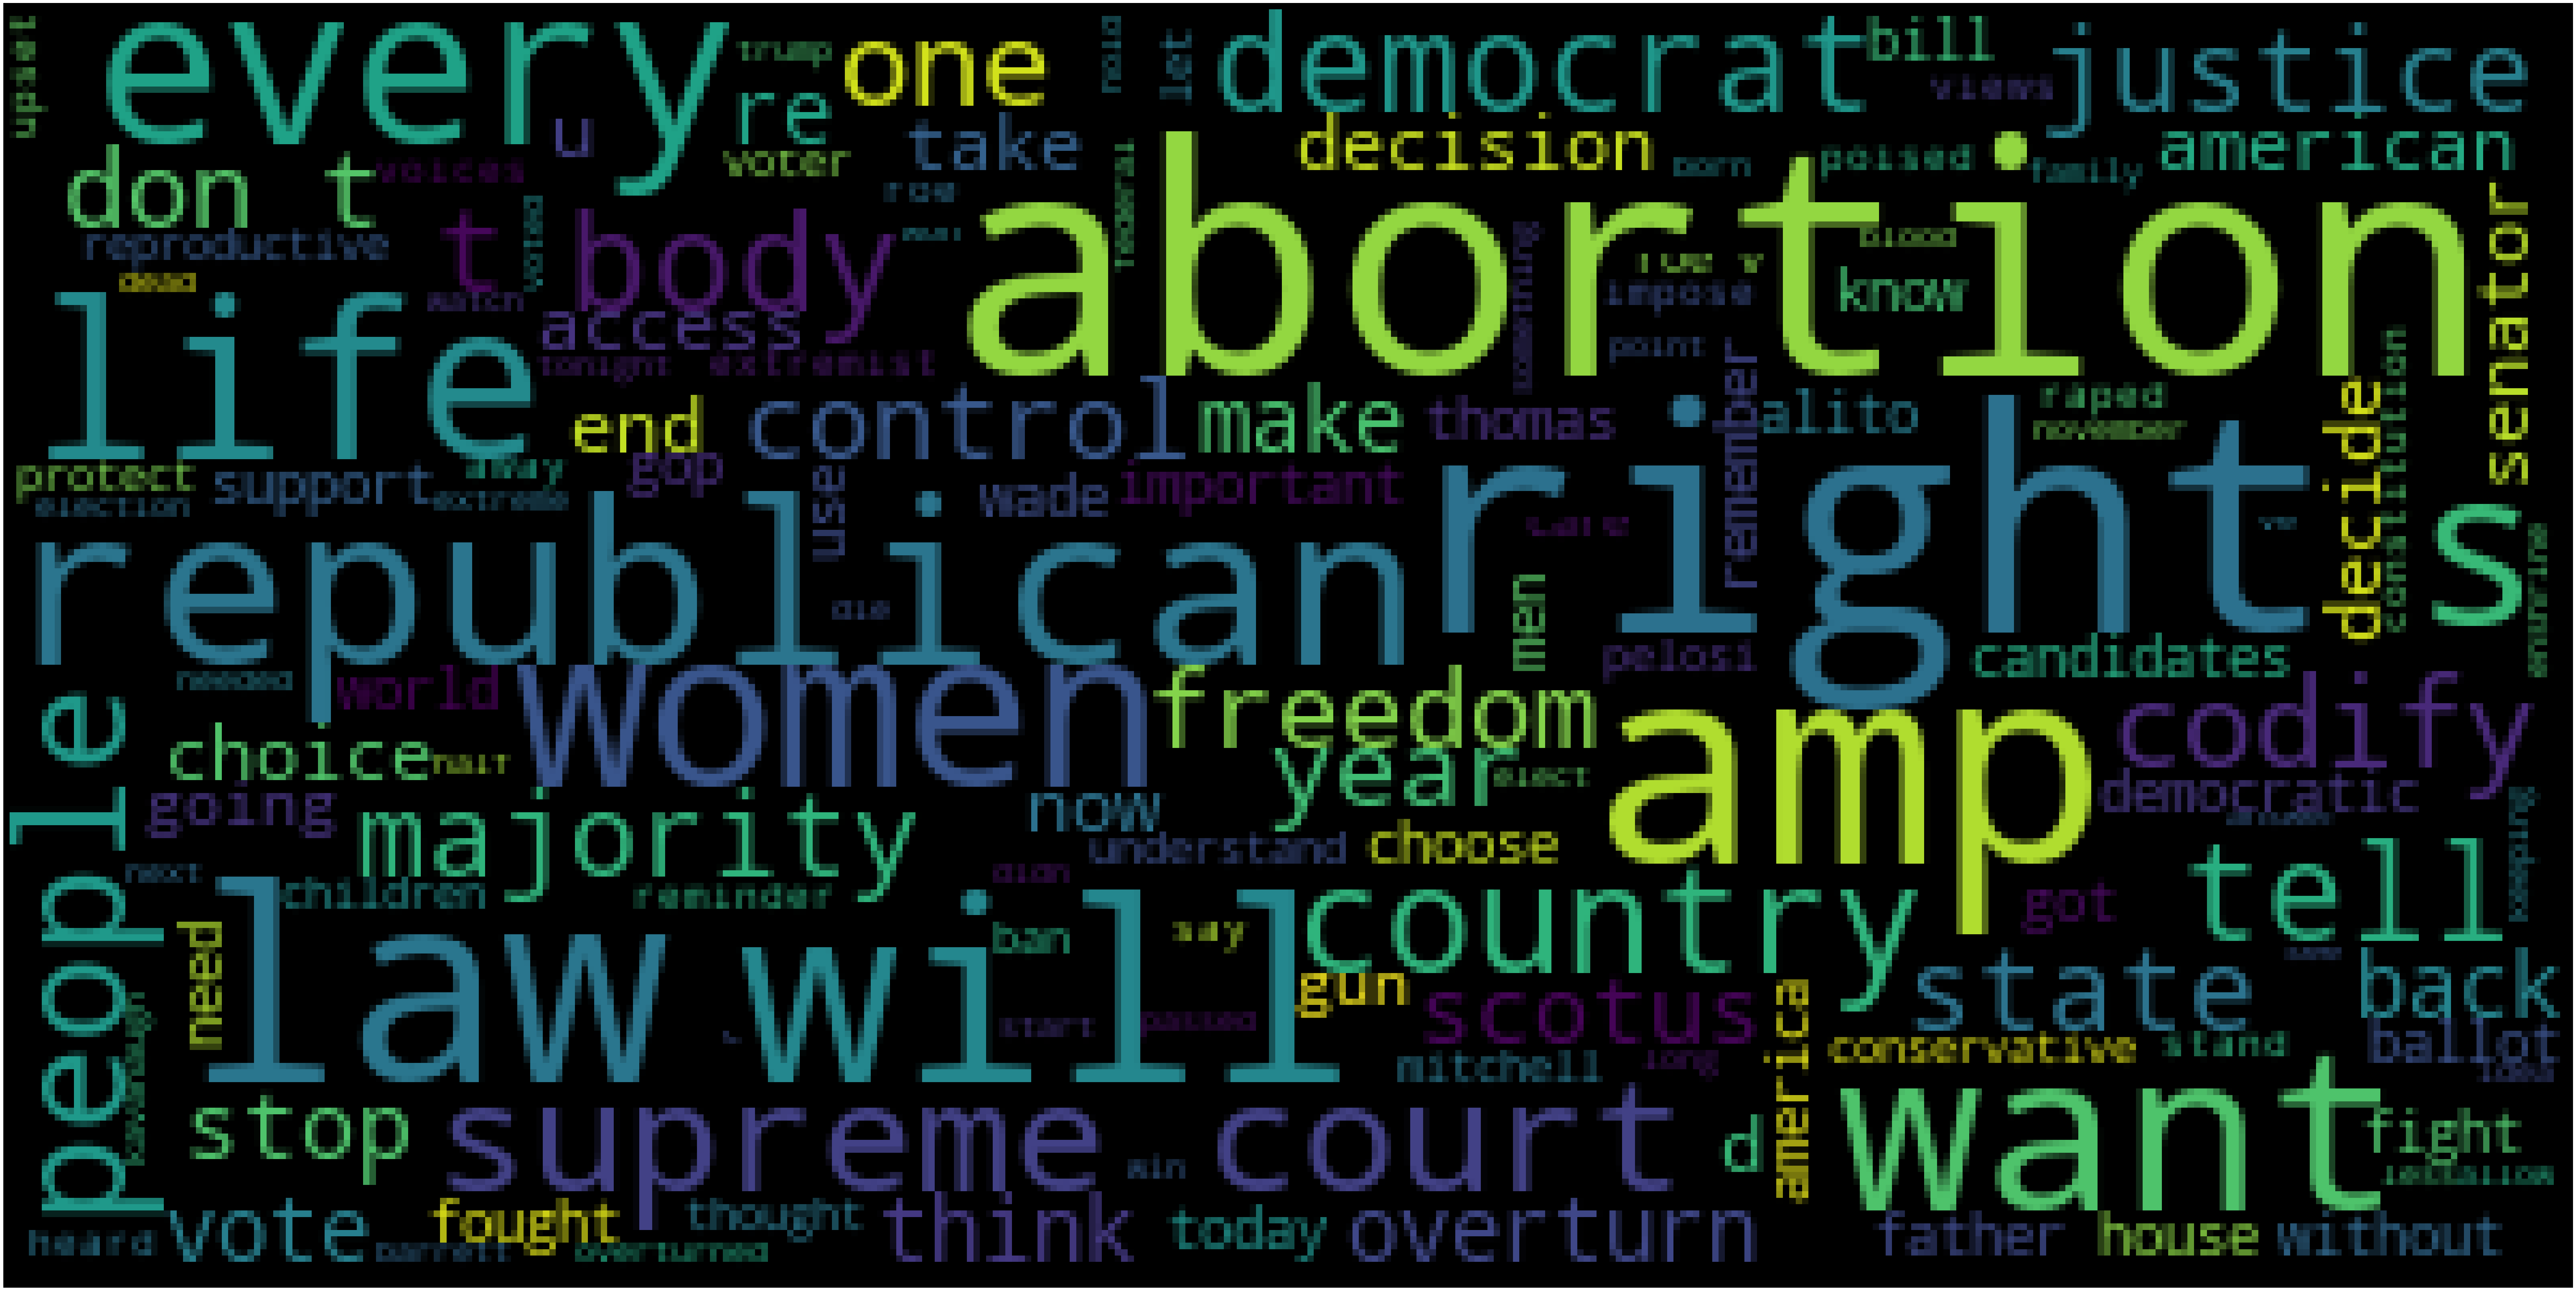

In [85]:
wc(clean_tweets,'black','Frequent Words' )